In [1]:
from GAME.utils.config import config
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

config_data = config()

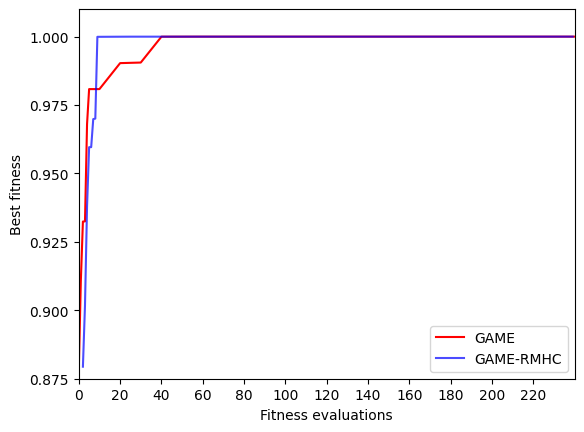

In [2]:
MC3D_GAME_evol_folder_path = os.path.join(config_data['output_path'], '01072023 Evolve MC Maps with GAME 240 FE')
trials = 10
GAME_fitness_evaluations = [i for i in range(10, 250, 10)]
GAME_trials_best_fitness = []
GAME_first_mapping_avg = []
for trial in range(trials):
    trial_stats = os.path.join(MC3D_GAME_evol_folder_path, 'MC_trial{}_stats.txt'.format(trial))
    trial_df = pd.read_csv(trial_stats, index_col=False, header=0)    
    GAME_trials_best_fitness.append(trial_df['best_fitness'].to_list())
    GAME_first_mapping_avg.append(trial_df['best_fitness'].to_list()[0])
GAME_trials_best_fitness = np.array(GAME_trials_best_fitness)
GAME_trials_best_fitness = GAME_trials_best_fitness.mean(axis = 0)

GAME_init_fitness = []
init_pop_size = 10
for _ in range(trials):
    GAME_init_fitness.append([])
for trial in range(trials):
    trial_stats = os.path.join(MC3D_GAME_evol_folder_path, 'trial{}_population_results.txt'.format(trial))
    with open(trial_stats, 'r') as f:
        lines = f.readlines()
        for lidx, line in enumerate(lines):
            line_splt = line.split()
            if line_splt[0] == 'Initial':
                GAME_init_fitness[trial].append(float(line_splt[-1]))
GAME_init_avg_fitness = []
for i in range(trials):
    best = GAME_init_fitness[i][0]
    for j in range(init_pop_size):
        cur_best = GAME_init_fitness[i][j]
        if cur_best > best:
            GAME_init_fitness[i][j] = cur_best
            best = cur_best
        else:
            GAME_init_fitness[i][j] = best

for j in range(init_pop_size):
    run_sum = 0
    for i in range(trials):
        run_sum += GAME_init_fitness[i][j]
    GAME_init_avg_fitness.append(run_sum / trials)

GAME_trials_best_fitness = GAME_init_avg_fitness + list(GAME_trials_best_fitness)
GAME_fitness_evaluations = [i for i in range(init_pop_size - 1)] + GAME_fitness_evaluations

MC3D_GAMERMHC_evol_folder_path = os.path.join(config_data['output_path'], '01072023 Evolve MC Maps with GAME-RMHC 240 FE')
trials = 10
RMHC_fitness_evaluations = np.arange(2, 240, 1, dtype=int)
RMHC_trials_best_fitness = []
for trial in range(trials):
    trial_stats = os.path.join(MC3D_GAMERMHC_evol_folder_path, 'trial{}_stats.csv'.format(trial))
    trial_df = pd.read_csv(trial_stats, index_col=False, header=0)    
    RMHC_trials_best_fitness.append(trial_df['best_fitness'].to_list())
RMHC_trials_best_fitness = np.array(RMHC_trials_best_fitness)
RMHC_trials_best_fitness = RMHC_trials_best_fitness.mean(axis = 0)

plt.plot(GAME_fitness_evaluations, GAME_trials_best_fitness, label='GAME', c = 'red')
plt.plot(RMHC_fitness_evaluations, RMHC_trials_best_fitness[:-1], label='GAME-RMHC', alpha=0.70, c = 'blue')
plt.legend(loc = 'lower right')
plt.ylim(0.875, 1.01)
plt.xlim(0, 240)
plt.xticks([i for i in range(0, 240, 20)])
# plt.yticks([i*0.1 for i in range(8, 11, 1)])
plt.yticks([0.875, 0.9, 0.925, 0.95, 0.975, 1.0])
plt.xlabel('Fitness evaluations')
plt.ylabel('Best fitness')
# plt.title('Evolutionary curves for GAME and GAME-RMHC on Mountain Car')
plt.show()

In [62]:
GAME_init_fitness[1]

[0.8865505699700712,
 0.8865505699700712,
 0.9052322686413445,
 0.9052322686413445,
 0.9052322686413445,
 0.9052322686413445,
 0.9052322686413445,
 0.9052322686413445,
 0.9052322686413445,
 0.9998487691591581]

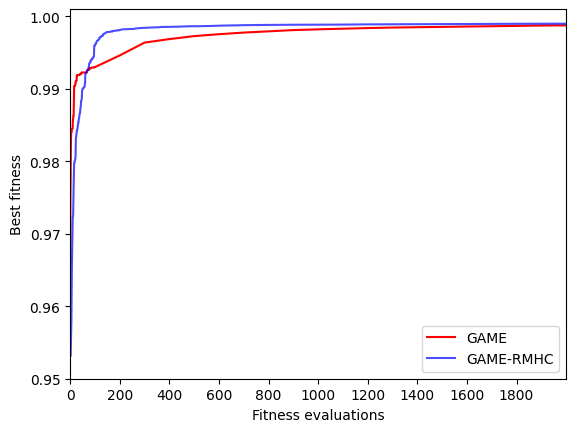

In [3]:
MC3D_GAME_evol_folder_path = os.path.join(config_data['output_path'], '01072023 Evolve keepaway Maps with GAME 2000 FE One-pt CX 0.043 Mutation MSE')
trials = 10
GAME_fitness_evaluations = [i for i in range(100, 2009, 100)]
GAME_trials_best_fitness = []
GAME_first_mapping_avg = []
for trial in range(trials):
    trial_stats = os.path.join(MC3D_GAME_evol_folder_path, 'trial{}_stats.txt'.format(trial))
    trial_df = pd.read_csv(trial_stats, index_col=False, header=0)    
    GAME_trials_best_fitness.append(trial_df['best_fitness'].to_list())
    GAME_first_mapping_avg.append(trial_df['best_fitness'].to_list()[0])
GAME_trials_best_fitness = np.array(GAME_trials_best_fitness)
GAME_trials_best_fitness = GAME_trials_best_fitness.mean(axis = 0)

GAME_init_fitness = []
init_pop_size = 100
for _ in range(trials):
    GAME_init_fitness.append([])
for trial in range(trials):
    trial_stats = os.path.join(MC3D_GAME_evol_folder_path, 'trial{}_population_results.txt'.format(trial))
    with open(trial_stats, 'r') as f:
        lines = f.readlines()
        for lidx, line in enumerate(lines):
            line_splt = line.split()
            if line_splt[0] == 'Initial':
                GAME_init_fitness[trial].append(float(line_splt[-1]))
GAME_init_avg_fitness = []
for i in range(trials):
    best = GAME_init_fitness[i][0]
    for j in range(init_pop_size):
        cur_best = GAME_init_fitness[i][j]
        if cur_best > best:
            GAME_init_fitness[i][j] = cur_best
            best = cur_best
        else:
            GAME_init_fitness[i][j] = best

for j in range(init_pop_size):
    run_sum = 0
    for i in range(trials):
        run_sum += GAME_init_fitness[i][j]
    GAME_init_avg_fitness.append(run_sum / trials)

GAME_trials_best_fitness = GAME_init_avg_fitness + list(GAME_trials_best_fitness)
GAME_fitness_evaluations = [i for i in range(init_pop_size - 1)] + GAME_fitness_evaluations

MC3D_GAMERMHC_evol_folder_path = os.path.join(config_data['output_path'], '01072023 Evolve keepaway Maps with GAME-RMHC 2000 FE MSE')
trials = 10
RMHC_fitness_evaluations = np.arange(2, 2000, 1, dtype=int)
RMHC_trials_best_fitness = []
for trial in range(trials):
    trial_stats = os.path.join(MC3D_GAMERMHC_evol_folder_path, 'trial{}_stats.txt'.format(trial))
    trial_df = pd.read_csv(trial_stats, index_col=False, header=0)    
    RMHC_trials_best_fitness.append(trial_df['best_fitness'].to_list())
RMHC_trials_best_fitness = np.array(RMHC_trials_best_fitness)
RMHC_trials_best_fitness = RMHC_trials_best_fitness.mean(axis = 0)

plt.plot(GAME_fitness_evaluations, GAME_trials_best_fitness, label='GAME', c = 'red')
plt.plot(RMHC_fitness_evaluations, RMHC_trials_best_fitness[:-1], label='GAME-RMHC', alpha=0.70, c = 'blue')
plt.legend(loc = 'lower right')
plt.ylim(0.95, 1.001)
plt.xlim(0, 2000)
plt.xticks([i for i in range(0, 2000, 200)])
# plt.yticks([i*0.1 for i in range(8, 11, 1)])
plt.yticks([0.95, 0.96, 0.97, 0.98, 0.99, 1.0])
plt.xlabel('Fitness evaluations')
plt.ylabel('Best fitness')
# plt.title('Evolutionary curves for GAME and GAME-RMHC on Keepaway')
plt.show()

In [29]:
GAME_trials_best_fitness

[0.9946118223555116,
 0.9946118223555116,
 0.99638122709305,
 0.9968647348405375,
 0.9972762041593889,
 0.9975371061265953,
 0.9977644663185549,
 0.9979340084847224,
 0.9981081812637811,
 0.9982112582268797,
 0.9982961251844813,
 0.9983863862967635,
 0.9984559772017526,
 0.9985033707369796,
 0.9985475901768777,
 0.9985987511735848,
 0.9986404657203642,
 0.9986843097791095,
 0.9987321344302732,
 0.9987594773323976]

In [21]:
len(GAME_first_mapping_avg[0])

19

In [9]:
GAME_fitness_evaluations

[1,
 200,
 300,
 400,
 500,
 600,
 700,
 800,
 900,
 1000,
 1100,
 1200,
 1300,
 1400,
 1500,
 1600,
 1700,
 1800,
 1900,
 2000]

In [34]:
summation = 0
for i in range(10):
    with open(os.path.join(MC3D_GAME_evol_folder_path, 'trial{}_population_results.txt'.format(i)), 'r') as f:
        lines = f.readlines()
        for j in range(1, 11):
            if 'I' == lines[j][0]:
                summation += float(lines[j].split()[-1])

In [35]:
summation / 100

-98.59776591784507

#### GAME

In [3]:
MC3D_GAME_evol_folder_path = os.path.join(config_data['output_path'], '11112022 Evolve MC Maps with GAME 240 FE')
trials = 10

In [4]:
trial_stats = os.path.join(MC3D_GAME_evol_folder_path, 'MC_trial0_stats.txt')
trial_df = pd.read_csv(trial_stats, index_col=False, header=0)

In [5]:
GAME_fitness_evaluations = [i for i in range(20, 250, 10)]
GAME_trials_best_fitness = []

In [6]:
for trial in range(trials):
    trial_stats = os.path.join(MC3D_GAME_evol_folder_path, 'MC_trial{}_stats.txt'.format(trial))
    trial_df = pd.read_csv(trial_stats, index_col=False, header=0)    
    GAME_trials_best_fitness.append(trial_df[' best_fitness'].to_list())

In [7]:
GAME_trials_best_fitness = np.array(GAME_trials_best_fitness)
GAME_trials_best_fitness = GAME_trials_best_fitness.mean(axis = 0)

(0.0, 1.0)

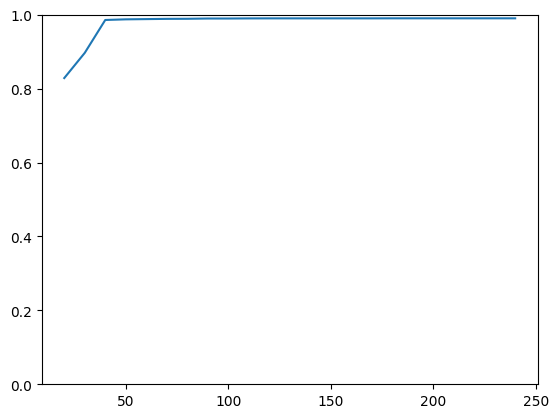

In [8]:
plt.plot(GAME_fitness_evaluations, GAME_trials_best_fitness)
plt.ylim(0, 1)

#### GAME_SAHC

In [54]:
MC3D_GAME_evol_folder_path = os.path.join(config_data['output_path'], '11112022 Evolve MC Maps with GAME_SAHC 240 FE')
trials = 10

In [55]:
trial_stats = os.path.join(MC3D_GAME_evol_folder_path, 'MC_trial0_stats.txt')
trial_df = pd.read_csv(trial_stats, index_col=False, header=0)
trial_df.head()

,trial_no,generation,fitness_evaluations,comparisons,best_fitness,best_fitness_ind_ID
0,0,0,15,30,0.554801,11111102
1,0,1,29,28,0.976787,10111102
2,0,2,43,28,0.985791,10111100
3,0,3,57,28,0.987613,10110100
4,0,4,71,28,0.988931,10100100


In [56]:
SAHC_fitness_evaluations = np.arange(15, 250, (250 - 15) / 18, dtype=int)
SAHC_trials_best_fitness = []

In [57]:
for trial in range(trials):
    trial_stats = os.path.join(MC3D_GAME_evol_folder_path, 'MC_trial{}_stats.txt'.format(trial))
    trial_df = pd.read_csv(trial_stats, index_col=False, header=0)    
    SAHC_trials_best_fitness.append(trial_df[' best_fitness'].to_list())

In [58]:
SAHC_trials_best_fitness = np.array(SAHC_trials_best_fitness)
SAHC_trials_best_fitness = SAHC_trials_best_fitness.mean(axis = 0)

(0.0, 1.0)

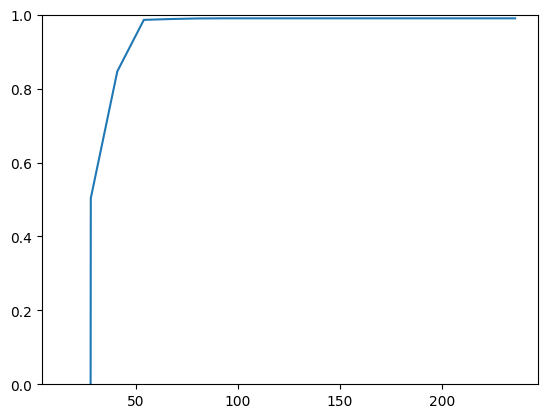

In [59]:
plt.plot(SAHC_fitness_evaluations, SAHC_trials_best_fitness)
plt.ylim(0, 1)

(0.0, 240.0)

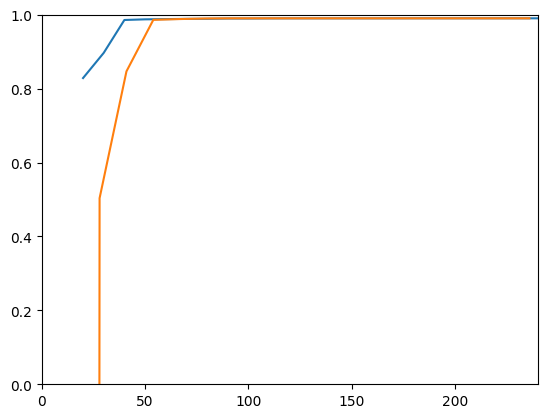

In [19]:
plt.plot(GAME_fitness_evaluations, GAME_trials_best_fitness, label='GAME')
plt.plot(SAHC_fitness_evaluations, SAHC_trials_best_fitness, label='GAME_SAHC')
plt.ylim(0, 1)
plt.xlim(0, 240)

#### RMHC 

In [20]:
MC3D_GAME_evol_folder_path = os.path.join(config_data['output_path'], '11112022 Evolve MC Maps with GAME_RMHC 240 FE')
trials = 10

In [47]:
trial_stats = os.path.join(MC3D_GAME_evol_folder_path, 'MC_trial2_stats.csv')
trial_df = pd.read_csv(trial_stats, index_col=False, header=0)
trial_df.tail()

,trial_no,generation,fitness_evaluations,comparisons,best_fitness,best_fitness_ind_ID
234,2,234,236,2,0.990164,10100000
235,2,235,237,2,0.990164,10100000
236,2,236,238,2,0.990164,10100000
237,2,237,239,2,0.990164,10100000
238,2,238,240,2,0.990164,10100000


In [48]:
RMHC_fitness_evaluations = np.arange(2, 240, 1, dtype=int)
RMHC_trials_best_fitness = []

In [50]:
for trial in range(trials):
    trial_stats = os.path.join(MC3D_GAME_evol_folder_path, 'MC_trial{}_stats.csv'.format(trial))
    trial_df = pd.read_csv(trial_stats, index_col=False, header=0)    
    RMHC_trials_best_fitness.append(trial_df['best_fitness'].to_list())

In [51]:
RMHC_trials_best_fitness = np.array(RMHC_trials_best_fitness)
RMHC_trials_best_fitness = RMHC_trials_best_fitness.mean(axis = 0)

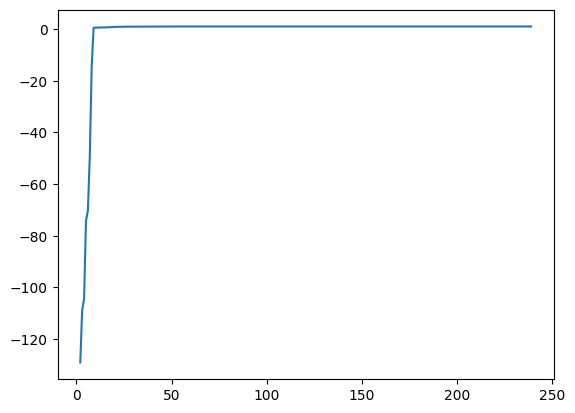

In [53]:
plt.plot(RMHC_fitness_evaluations, RMHC_trials_best_fitness[:-1])

(0.0, 240.0)

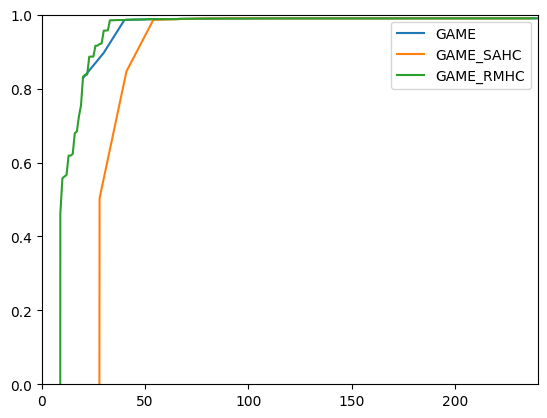

In [61]:
plt.plot(GAME_fitness_evaluations, GAME_trials_best_fitness, label='GAME')
plt.plot(SAHC_fitness_evaluations, SAHC_trials_best_fitness, label='GAME_SAHC')
plt.plot(RMHC_fitness_evaluations, RMHC_trials_best_fitness[:-1], label='GAME_RMHC')
plt.legend()
plt.ylim(0, 1)
plt.xlim(0, 240)